In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
train_df = pd.read_csv('train.csv')
dev_df = pd.read_csv('val.csv')
test_df = pd.read_csv('test.csv')

train_df
     

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,1.766704e-07,0.048082,-0.038894,-0.003018,0.064603,-0.095056,-0.005437,0.064929,...,-0.075058,-0.162528,-0.021399,-0.076072,-0.195088,-0.022435,-0.075171,-0.220513,-0.022455,13
1,0.0,0.0,1.688599e-07,-0.029905,-0.025193,-0.011584,-0.046020,-0.064103,-0.016690,-0.019636,...,0.043366,-0.124712,-0.034028,0.033302,-0.111789,-0.036003,0.021419,-0.095349,-0.037406,14
2,0.0,0.0,3.742037e-07,0.034434,-0.091529,0.001648,0.036881,-0.217266,-0.008307,0.006917,...,-0.117535,-0.280503,-0.079920,-0.109211,-0.244307,-0.067875,-0.092286,-0.200278,-0.055118,17
3,0.0,0.0,6.730789e-07,0.037382,-0.158167,0.004150,-0.000446,-0.298733,0.001566,-0.067999,...,-0.237668,-0.236605,-0.040911,-0.206228,-0.215249,-0.029901,-0.171467,-0.184108,-0.018419,10
4,0.0,0.0,4.800709e-07,-0.090609,-0.084238,-0.000219,-0.048800,-0.179443,-0.010900,0.077261,...,0.253582,-0.225756,-0.068367,0.244974,-0.202977,-0.054519,0.212128,-0.172536,-0.041300,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,0.0,0.0,1.739973e-07,0.045000,-0.016633,-0.010705,0.080710,-0.053062,-0.015828,0.115962,...,-0.067970,-0.084949,-0.029260,-0.055297,-0.057940,-0.028591,-0.043701,-0.037170,-0.024801,15
15401,0.0,0.0,-3.781399e-08,-0.022484,-0.025729,-0.003883,-0.057472,-0.044821,-0.011801,-0.079660,...,-0.148776,0.022665,-0.030953,-0.135272,0.019695,-0.022943,-0.114358,0.020409,-0.017399,4
15402,0.0,0.0,-2.875680e-07,-0.004105,-0.054498,-0.002448,-0.034375,-0.100531,-0.004528,-0.053594,...,-0.229850,0.015229,-0.020358,-0.271518,0.021956,-0.021292,-0.304911,0.023179,-0.021602,0
15403,0.0,0.0,-3.549019e-08,-0.029860,-0.025330,-0.005069,-0.047845,-0.054450,-0.008212,-0.042354,...,0.025529,-0.120754,-0.011477,0.027165,-0.141075,-0.010744,0.027909,-0.159175,-0.008155,11


In [3]:
X_train = train_df.drop(columns=["label"])
Y_train = train_df["label"]

X_dev = dev_df.drop(columns=["label"])
Y_dev = dev_df["label"]

X_test = test_df.drop(columns=["label"])
Y_test = test_df["label"]


In [5]:
from sklearn.svm import SVC

for c in [0.1, 1, 10, 100]:

    model = SVC(C=c)
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_dev)
    
    acc = accuracy_score(Y_dev, y_pred)
    precision = precision_score(Y_dev, y_pred,average='macro')
    recall = recall_score(Y_dev, y_pred,average='macro')
    f1 = f1_score(Y_dev, y_pred,average='macro')
    
    
    print(f"C: {c:5} | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | precision: {precision:.4f}")

C:   0.1 | Accuracy: 0.5842 | Recall: 0.5829 | F1-Score: 0.5733 | precision: 0.6948
C:     1 | Accuracy: 0.8343 | Recall: 0.8359 | F1-Score: 0.8380 | precision: 0.8583
C:    10 | Accuracy: 0.9252 | Recall: 0.9258 | F1-Score: 0.9259 | precision: 0.9292
C:   100 | Accuracy: 0.9587 | Recall: 0.9592 | F1-Score: 0.9588 | precision: 0.9597


###  Linear Kernel

In [9]:
linear_results = []
for c in [0.1, 1, 10, 100]:
    model = SVC(kernel='linear', C=c)
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_dev)
 
    acc=accuracy_score(Y_dev, y_pred)
    precision = precision_score(Y_dev, y_pred,average='macro')
    recall = recall_score(Y_dev, y_pred,average='macro')
    f1 = f1_score(Y_dev, y_pred,average='macro') 
    
    linear_results.append({
        'Kernel': 'Linear', 'C': c,
        'Accuracy': acc,
        'F1-Score': f1,
        'Recall': recall,        
        'precision': precision })
    print(f"C: {c} | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | precision: {precision:.4f}")


C: 0.1 | Accuracy: 0.6722 | Recall: 0.6740 | F1-Score: 0.6631 | precision: 0.7495
C: 1 | Accuracy: 0.8208 | Recall: 0.8239 | F1-Score: 0.8248 | precision: 0.8402
C: 10 | Accuracy: 0.8793 | Recall: 0.8822 | F1-Score: 0.8818 | precision: 0.8844
C: 100 | Accuracy: 0.9112 | Recall: 0.9131 | F1-Score: 0.9127 | precision: 0.9137


### RBF Kernel

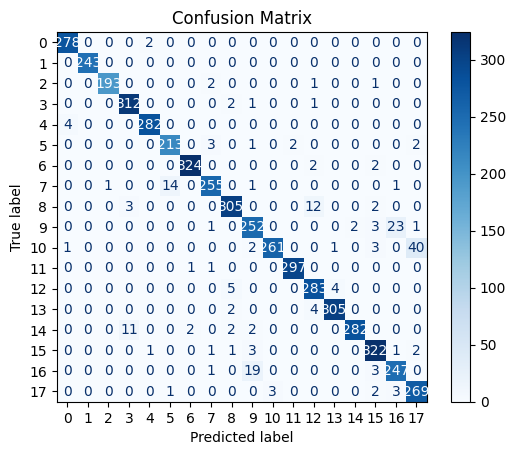

Gamma: scale | Accuracy: 0.9587 | Recall: 0.9592 | F1-Score: 0.9588| precision: 0.9597


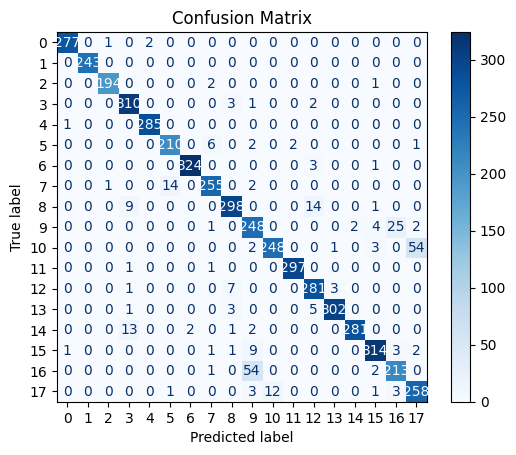

Gamma: 0.1 | Accuracy: 0.9422 | Recall: 0.9427 | F1-Score: 0.9425| precision: 0.9444


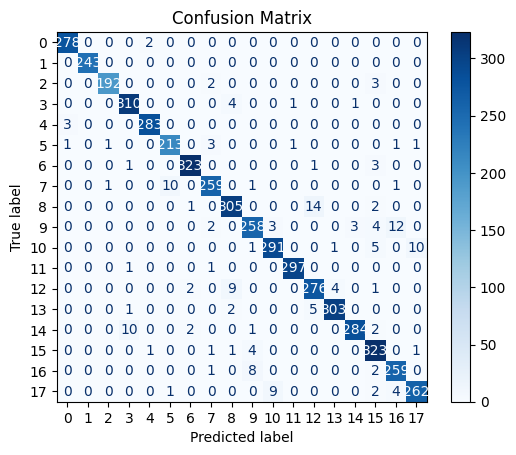

Gamma: 1 | Accuracy: 0.9657 | Recall: 0.9659 | F1-Score: 0.9661| precision: 0.9665


In [6]:
rbf_results = []

# Using C=100 
for g in ["scale", 0.1, 1]:
    model = SVC(kernel='rbf', C=100, gamma=g)
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_dev)
    
    acc = accuracy_score(Y_dev, y_pred) 
    precision = precision_score(Y_dev, y_pred,average='macro')
    recall = recall_score(Y_dev, y_pred,average='macro')
    f1 = f1_score(Y_dev, y_pred,average='macro') 
    
    conf = ConfusionMatrixDisplay.from_predictions(Y_dev, y_pred, cmap='Blues')
    conf.ax_.set_title(f"Confusion Matrix")
    plt.show() 
    
    rbf_results.append({
        'Kernel': 'RBF', 'C': 100,  'Gamma': g,
        'Accuracy': acc,
       'Recall': recall,
       'F1-Score': f1,
       'precision': precision })
    
    print(f"Gamma: {g} | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}| precision: {precision:.4f}" )


### Poly kernel

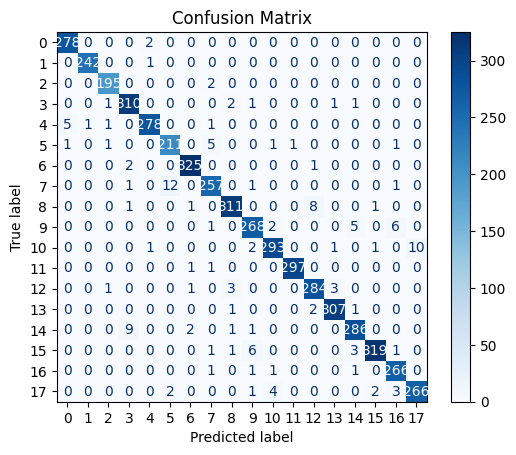

Degree: 2 | Accuracy: 0.9723 | Recall: 0.9725 | F1-Score: 0.9722 | precision: 0.9719


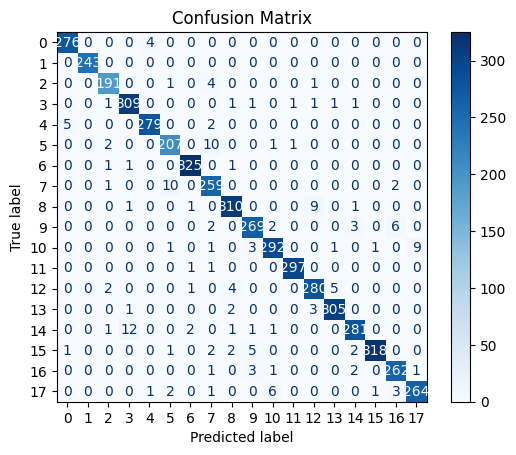

Degree: 3 | Accuracy: 0.9673 | Recall: 0.9670 | F1-Score: 0.9668 | precision: 0.9666


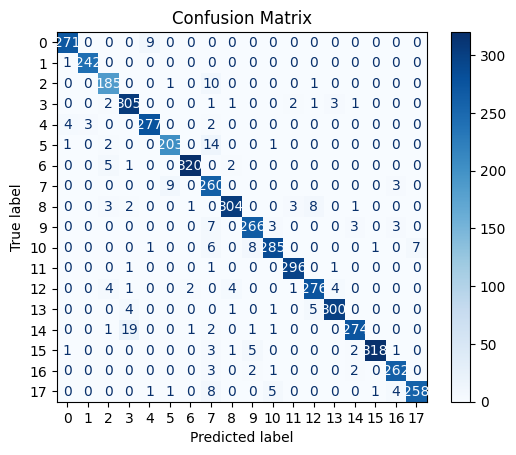

Degree: 4 | Accuracy: 0.9546 | Recall: 0.9541 | F1-Score: 0.9540 | precision: 0.9547


In [7]:
poly_results = []

# Using C=100 and degrees 2, 3, and 4
for d in [2, 3, 4]:
    
    model = SVC(kernel='poly', C=100, degree=d, gamma=1)
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_dev)
    
    acc = accuracy_score(Y_dev, y_pred)
    precision = precision_score(Y_dev, y_pred,average='macro')
    recall = recall_score(Y_dev, y_pred,average='macro')
    f1 = f1_score(Y_dev, y_pred,average='macro')

    
    conf = ConfusionMatrixDisplay.from_predictions(Y_dev, y_pred, cmap='Blues')
    conf.ax_.set_title(f"Confusion Matrix")
    plt.show() 
   
    poly_results.append({
        'Kernel': 'Poly', 'C': 100, 'Degree': d, 'Gamma': 1,
        'Accuracy': acc,
        'Recall': recall,
        'F1-Score': f1,
        "precision": precision })
    
    
    print(f"Degree: {d} | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | precision: {precision:.4f}")

In [10]:
linear_df = pd.DataFrame(linear_results)
rbf_df = pd.DataFrame(rbf_results)
poly_df = pd.DataFrame(poly_results)

best_linear = linear_df.loc[linear_df['F1-Score'].idxmax()].copy()
best_rbf = rbf_df.loc[rbf_df['F1-Score'].idxmax()].copy()
best_poly = poly_df.loc[poly_df['F1-Score'].idxmax()].copy()


best_svms = pd.DataFrame([best_linear, best_rbf, best_poly])

best_svms= best_svms.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

print(" Best SVM Kernel ")
best_svms

 Best SVM Kernel 


,Kernel,C,Accuracy,F1-Score,Recall,precision,Gamma,Degree
0,Poly,100.0,0.972347,0.972165,0.972496,0.971935,1.0,2.0
1,RBF,100.0,0.965725,0.966081,0.965879,0.966474,1.0,NaN
2,Linear,100.0,0.911198,0.912729,0.913091,0.913738,NaN,NaN


### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

n_values = [50, 100, 200]
 
rf_results = []

for n in n_values:

        model = RandomForestClassifier(n_estimators=n, random_state=42)
        model.fit(X_train, Y_train)
        
        y_dev_pred = model.predict(X_dev)
        
        train_acc = model.score(X_train, Y_train)
        
        acc=accuracy_score(Y_dev,y_dev_pred)
        precision = precision_score(Y_dev, y_pred,average='macro')
        recall = recall_score(Y_dev, y_pred,average='macro')
        f1 = f1_score(Y_dev, y_pred,average='macro') 
        

        rf_results.append({
            'n_estimators': n,
            'Train Acc': train_acc,
            'Accuracy': acc,
            'Recall': recall,
            'F1-Score': f1,
            'precision': precision })
        
        print(f"Depth={d}, n_estimators={n} | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | precision: {precision:.4f}")


rf_df = pd.DataFrame(rf_results)
rf_df

Depth=4, n_estimators=50 | Accuracy: 0.9293 | Recall: 0.9131 | F1-Score: 0.9127 | precision: 0.9137
Depth=4, n_estimators=100 | Accuracy: 0.9392 | Recall: 0.9131 | F1-Score: 0.9127 | precision: 0.9137
Depth=4, n_estimators=200 | Accuracy: 0.9410 | Recall: 0.9131 | F1-Score: 0.9127 | precision: 0.9137


,n_estimators,Train Acc,Accuracy,Recall,F1-Score,precision
0,50,1.0,0.929309,0.913091,0.912729,0.913738
1,100,1.0,0.939241,0.913091,0.912729,0.913738
2,200,1.0,0.940993,0.913091,0.912729,0.913738


In [14]:
depths = [None,10, 20,30,50] 

rf_results = []

for d in depths:
      
        model = RandomForestClassifier(n_estimators=200, max_depth=d, random_state=42)
        model.fit(X_train, Y_train)
        
        
        y_dev_pred = model.predict(X_dev)
        
        train_acc = model.score(X_train, Y_train)
        acc = accuracy_score(Y_dev, y_dev_pred)
        precision = precision_score(Y_dev, y_dev_pred,average='macro')
        recall = recall_score(Y_dev, y_dev_pred,average='macro')
        f1 = f1_score(Y_dev, y_dev_pred,average='macro') 
        
       
        rf_results.append({
            'Max Depth': d,
            'n_estimators': 200,
            'Train Acc': train_acc,
            'Accuracy': acc,
            'Recall': recall,
            'F1-Score': f1,
            'precision': precision
        })
        
        print(f"Depth={d}, n_estimators=200 | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | precision: {precision:.4f}")

rf_df = pd.DataFrame(rf_results)
rf_df

Depth=None, n_estimators=200 | Accuracy: 0.9410 | Recall: 0.9414 | F1-Score: 0.9413 | precision: 0.9418
Depth=10, n_estimators=200 | Accuracy: 0.8654 | Recall: 0.8656 | F1-Score: 0.8658 | precision: 0.8706
Depth=20, n_estimators=200 | Accuracy: 0.9412 | Recall: 0.9413 | F1-Score: 0.9413 | precision: 0.9417
Depth=30, n_estimators=200 | Accuracy: 0.9418 | Recall: 0.9422 | F1-Score: 0.9420 | precision: 0.9425
Depth=50, n_estimators=200 | Accuracy: 0.9410 | Recall: 0.9414 | F1-Score: 0.9413 | precision: 0.9418


,Max Depth,n_estimators,Train Acc,Accuracy,Recall,F1-Score,precision
0,NaN,200,1.000000,0.940993,0.941439,0.941306,0.941794
1,10.0,200,0.906394,0.865433,0.865550,0.865782,0.870568
2,20.0,200,0.999935,0.941188,0.941319,0.941318,0.941735
3,30.0,200,1.000000,0.941772,0.942158,0.942049,0.942535
4,50.0,200,1.000000,0.940993,0.941439,0.941306,0.941794


### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [3, 5, 7, 11, 21]

knn_results = []


for n in neighbors:
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(X_train, Y_train)
        
       
        y_train_pred = model.predict(X_train)
        y_dev_pred = model.predict(X_dev)
        
        train_acc = accuracy_score(Y_train, y_train_pred)
        acc = accuracy_score(Y_dev, y_dev_pred)
        precision = precision_score(Y_dev, y_dev_pred,average='macro')
        recall = recall_score(Y_dev, y_dev_pred,average='macro')
        f1 = f1_score(Y_dev, y_dev_pred,average='macro') 
        
       
        knn_results.append({
            'Neighbors': n,
            'Train Acc': train_acc,
            'Accuracy': acc,
            'Recall': recall,
            'F1-Score': f1,
            'precision': precision })
        print(f"n={n} | Accuracy: {acc:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | precision: {precision:.4f}")

knn_df = pd.DataFrame(knn_results)
knn_df

n=3 | Accuracy: 0.9034 | Recall: 0.9049 | F1-Score: 0.9046 | precision: 0.9049
n=5 | Accuracy: 0.9011 | Recall: 0.9032 | F1-Score: 0.9031 | precision: 0.9035
n=7 | Accuracy: 0.9003 | Recall: 0.9023 | F1-Score: 0.9021 | precision: 0.9025
n=11 | Accuracy: 0.8933 | Recall: 0.8955 | F1-Score: 0.8952 | precision: 0.8957
n=21 | Accuracy: 0.8740 | Recall: 0.8771 | F1-Score: 0.8773 | precision: 0.8790


,Neighbors,Train Acc,Accuracy,Recall,F1-Score,precision
0,3,0.955469,0.903408,0.904870,0.904622,0.904850
1,5,0.941967,0.901071,0.903220,0.903071,0.903473
2,7,0.935216,0.900292,0.902327,0.902127,0.902455
3,11,0.920740,0.893281,0.895548,0.895200,0.895654
4,21,0.895034,0.874002,0.877086,0.877344,0.878972


-------Final Comparison----------
           Model                                        Params  Accuracy  \
0            SVM  Kernel=Poly, C=100.0, degree =2.0, Gamma=1.0  0.972347   
2  Random Forest                         Trees=200, Depth=30.0  0.941772   
1            KNN                                   Neighbors=3  0.903408   

     Recall  F1-Score  
0  0.972496  0.972165  
2  0.942158  0.942049  
1  0.904870  0.904622  


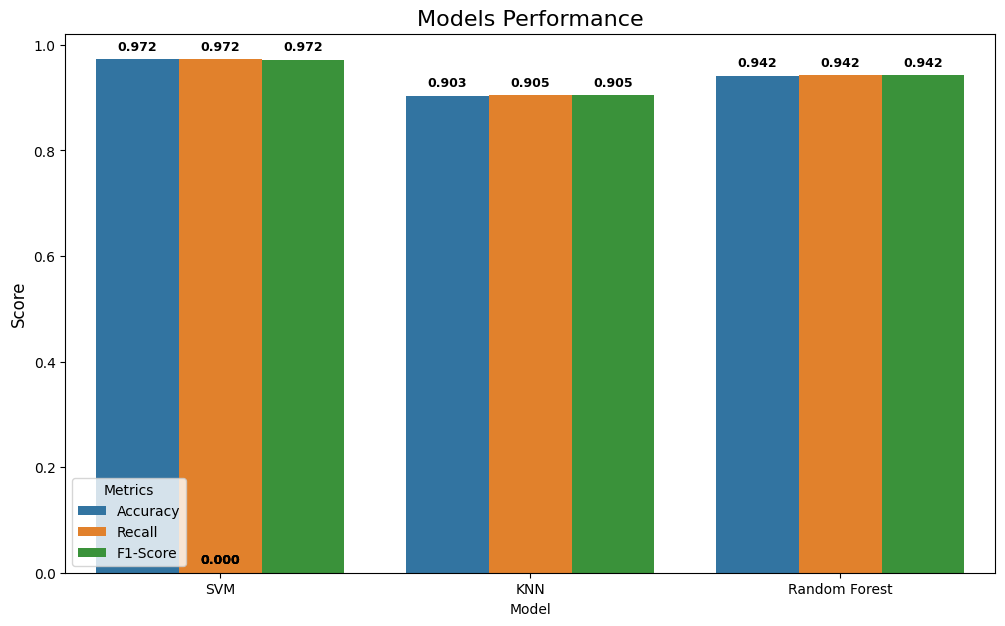

In [24]:
best_svm = best_svms.loc[best_svms['F1-Score'].idxmax()]
best_knn = knn_df.loc[knn_df['F1-Score'].idxmax()]
best_rf = rf_df.loc[rf_df['F1-Score'].idxmax()]


comparison_data = [
    {
        'Model': 'SVM', 
        'Params': f"Kernel={best_svm['Kernel']}, C={best_svm['C']}, degree ={best_svm['Degree']}, Gamma={best_svm['Gamma']}",
        'Accuracy': best_svm['Accuracy'], 
        'Recall': best_svm['Recall'], 
        'F1-Score': best_svm['F1-Score']
    },
    {
        'Model': 'KNN', 
        'Params': f"Neighbors={int(best_knn['Neighbors'])}",
        'Accuracy': best_knn['Accuracy'], 
        'Recall': best_knn['Recall'], 
        'F1-Score': best_knn['F1-Score']
    },
    {
        'Model': 'Random Forest', 
        'Params': f"Trees={int(best_rf['n_estimators'])}, Depth={best_rf['Max Depth']}",
        'Accuracy': best_rf['Accuracy'], 
        'Recall': best_rf['Recall'], 
        'F1-Score': best_rf['F1-Score']
    }
]

Best_models_df = pd.DataFrame(comparison_data)


df_melted = Best_models_df.drop(columns=['Params']).melt(id_vars='Model', var_name='Metric', value_name='Score')


plt.figure(figsize=(12, 7))

ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points',fontsize=9,fontweight='bold')


plt.title('Models Performance', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.legend(title="Metrics")


print("-------Final Comparison----------")
print(Best_models_df.sort_values(by='F1-Score', ascending=False))
plt.show()

In [19]:
Best_models_df

,Model,Params,Accuracy,Recall,F1-Score
0,SVM,"Kernel=Poly, C=100.0, degree =2.0, Gamma=1.0",0.972347,0.972496,0.972165
1,KNN,Neighbors=3,0.903408,0.904870,0.904622
2,Random Forest,"Trees=200, Depth=30.0",0.941772,0.942158,0.942049


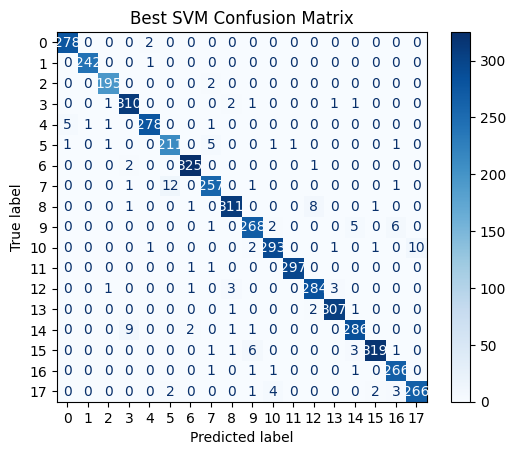

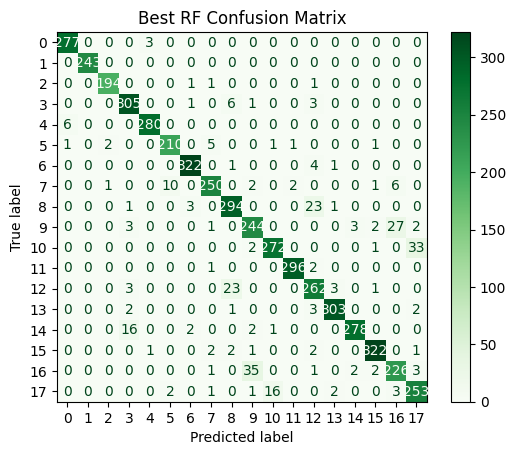

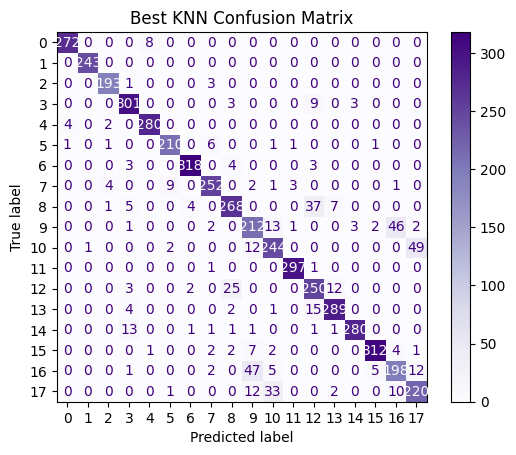

In [25]:
best_svm_model = SVC(kernel='poly', C=100, gamma=1,degree=2) 
best_svm_model.fit(X_train, Y_train)
y_pred_svm = best_svm_model.predict(X_dev)


best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=30)
best_rf_model.fit(X_train, Y_train)
y_pred_rf = best_rf_model.predict(X_dev)

best_knn_model = KNeighborsClassifier(n_neighbors=3)
best_knn_model.fit(X_train, Y_train)
y_knn_pred = best_knn_model.predict(X_dev)


ConfusionMatrixDisplay.from_predictions(Y_dev, y_pred_svm, cmap='Blues')
plt.title("Best SVM Confusion Matrix")
plt.savefig("svm_confusion_matrix.png")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_dev, y_pred_rf, cmap='Greens')
plt.title("Best RF Confusion Matrix")
plt.savefig("rf_confusion_matrix.png")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_dev, y_knn_pred, cmap='Purples')
plt.title(f"Best KNN Confusion Matrix")
plt.savefig("knn_confusion_matrix.png")
plt.show()

### Testing the models using X_test

In [26]:
# SVM Predictions
y_test_pred_svm = best_svm_model.predict(X_test)

# Random Forest Predictions
y_test_pred_rf = best_rf_model.predict(X_test)

# KNN Predictions
y_test_pred_knn = best_knn_model.predict(X_test)

In [27]:
test_metric_data = []

# SVM Results
test_metric_data.append({
    'Model': 'SVM (Poly)',
    'Accuracy': accuracy_score(Y_test, y_test_pred_svm),
    'Recall': recall_score(Y_test, y_test_pred_svm, average='macro'),
    'F1-Score': f1_score(Y_test, y_test_pred_svm, average='macro'),
    'Precision': precision_score(Y_test, y_test_pred_svm, average='macro')
})

# RF Results
test_metric_data.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(Y_test, y_test_pred_rf),
    'Recall': recall_score(Y_test, y_test_pred_rf, average='macro'),
    'F1-Score': f1_score(Y_test, y_test_pred_rf, average='macro'),
    'Precision': precision_score(Y_test, y_test_pred_rf, average='macro')
})

# KNN Results
test_metric_data.append({
    'Model': 'KNN',
    'Accuracy': accuracy_score(Y_test, y_test_pred_knn),
    'Recall': recall_score(Y_test, y_test_pred_knn, average='macro'),
    'F1-Score': f1_score(Y_test, y_test_pred_knn, average='macro'),
    'Precision': precision_score(Y_test, y_test_pred_knn, average='macro')
})

final_test_df = pd.DataFrame(test_metric_data)
print("FINAL TEST PERFORMANCE")
print(final_test_df.sort_values(by='F1-Score', ascending=False))

FINAL TEST PERFORMANCE
           Model  Accuracy    Recall  F1-Score  Precision
0     SVM (Poly)  0.976826  0.976609  0.976471   0.976443
1  Random Forest  0.937488  0.937768  0.937841   0.938331
2            KNN  0.909640  0.910690  0.910676   0.911267


In [28]:
import joblib

joblib.dump(best_svm_model, 'svm_model.pkl')

['svm_model.pkl']